# Bibliotecas utilizadas no projeto

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
import numpy as np

# Constantes do projeto

In [7]:
#Arquivo
FILE_PATH = 'UCI_Credit_Card.csv'


#Importando dataset e Exibindo algumas informações

In [8]:
dataset = pd.read_csv(FILE_PATH)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [9]:
# Mostrar algumas linhas do dataset
display(dataset)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


# 1 - Realize uma análise explorativa na base de dados respondendo as seguintes perguntas:

## a) Quais features são categóricas e quais são numéricas?

### Resposta:

**Categóricas**

*   **ID**: Identificador único de cada cliente. Embora seja um número, é usado apenas como identificador e não tem "valor" numérico.
*   **SEX**: Gênero (1 = masculino, 2 = feminino).
* **EDUCATION**: Escolaridade (1 = pós-graduação, 2 = universidade, 3 = ensino médio, 4 = outros, 5 = desconhecido, 6 = desconhecido).
* **MARRIAGE**: Status civil (1 = casado, 2 = solteiro, 3 = outros).
* **PAY_0 a PAY_6**: Status de pagamento
* **default.payment.next.month**: Pagamento em atraso no próximo mês (1 = sim, 0 = não). Representa a classificação de inadimplência e é uma variável categórica binária

**Numéricas**

* **LIMIT_BAL**: Valor do crédito concedido em dólares NT (inclui crédito individual e familiar/suplementar).
* **AGE**: Idade em anos.
* **BILL_AMT1 a BILL_AMT6**: Valor das faturas
* **PAY_AMT1 a PAY_AMT6**: Valor dos pagamentos anteriores



##b) Qual o percentual de nulos nas features?

In [10]:
# Calcular o percentual de valores nulos em cada feature
percentual_nulos = dataset.isnull().mean() * 100

percentual_nulos

ID                            0.0
LIMIT_BAL                     0.0
SEX                           0.0
EDUCATION                     0.0
MARRIAGE                      0.0
AGE                           0.0
PAY_0                         0.0
PAY_2                         0.0
PAY_3                         0.0
PAY_4                         0.0
PAY_5                         0.0
PAY_6                         0.0
BILL_AMT1                     0.0
BILL_AMT2                     0.0
BILL_AMT3                     0.0
BILL_AMT4                     0.0
BILL_AMT5                     0.0
BILL_AMT6                     0.0
PAY_AMT1                      0.0
PAY_AMT2                      0.0
PAY_AMT3                      0.0
PAY_AMT4                      0.0
PAY_AMT5                      0.0
PAY_AMT6                      0.0
default.payment.next.month    0.0
dtype: float64

### Verificando se há valores inválidos

In [11]:
def is_invalid(value, list):
  return value not in list


# Verificar valores inválidos
invalid_sex = dataset['SEX'].apply(lambda x: is_invalid(x, [1, 2])).mean() * 100
invalid_education = dataset['EDUCATION'].apply(lambda x: is_invalid(x, [1, 2, 3, 4,5,6])).mean() * 100
invalid_marriage = dataset['MARRIAGE'].apply(lambda x: is_invalid(x, [1, 2,3])).mean() * 100
invalid_pay = dataset[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].stack().map(lambda x: is_invalid(x, range(-1, 10))).mean() * 100

# Verificar valores NaN
nan_limit_bal = dataset['LIMIT_BAL'].isna().mean() * 100
nan_age = dataset['AGE'].isna().mean() * 100
nan_bill_amt = dataset[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].isna().mean().mean() * 100
nan_pay_amt = dataset[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].isna().mean().mean() * 100

# Resultados
print(f"% de valores inválidos em SEX: {invalid_sex:.2f}%")
print(f"% de valores inválidos em EDUCATION: {invalid_education:.2f}%")
print(f"% de valores inválidos em MARRIAGE: {invalid_marriage:.2f}%")
print(f"% de valores inválidos em PAY_0 a PAY_6: {invalid_pay:.2f}%")

print(f"% de valores NaN em LIMIT_BAL: {nan_limit_bal:.2f}%")
print(f"% de valores NaN em AGE: {nan_age:.2f}%")
print(f"% de valores NaN em BILL_AMT1 a BILL_AMT6: {nan_bill_amt:.2f}%")
print(f"% de valores NaN em PAY_AMT1 a PAY_AMT6: {nan_pay_amt:.2f}%")


% de valores inválidos em SEX: 0.00%
% de valores inválidos em EDUCATION: 0.05%
% de valores inválidos em MARRIAGE: 0.18%
% de valores inválidos em PAY_0 a PAY_6: 13.56%
% de valores NaN em LIMIT_BAL: 0.00%
% de valores NaN em AGE: 0.00%
% de valores NaN em BILL_AMT1 a BILL_AMT6: 0.00%
% de valores NaN em PAY_AMT1 a PAY_AMT6: 0.00%


Analizando os valores inesperados

In [12]:
dataset['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [13]:
dataset['MARRIAGE'].unique()

array([1, 2, 3, 0], dtype=int64)

In [14]:
unique_values = dataset[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].apply(lambda x: sorted(x.unique()))
unique_values

PAY_0    [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_2    [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_3    [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_4    [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_5       [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
PAY_6       [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
dtype: object

In [15]:
dataset.duplicated().sum()

0

##c) Qual a distribuição dos valores para cada feature? (identificação de outliers)

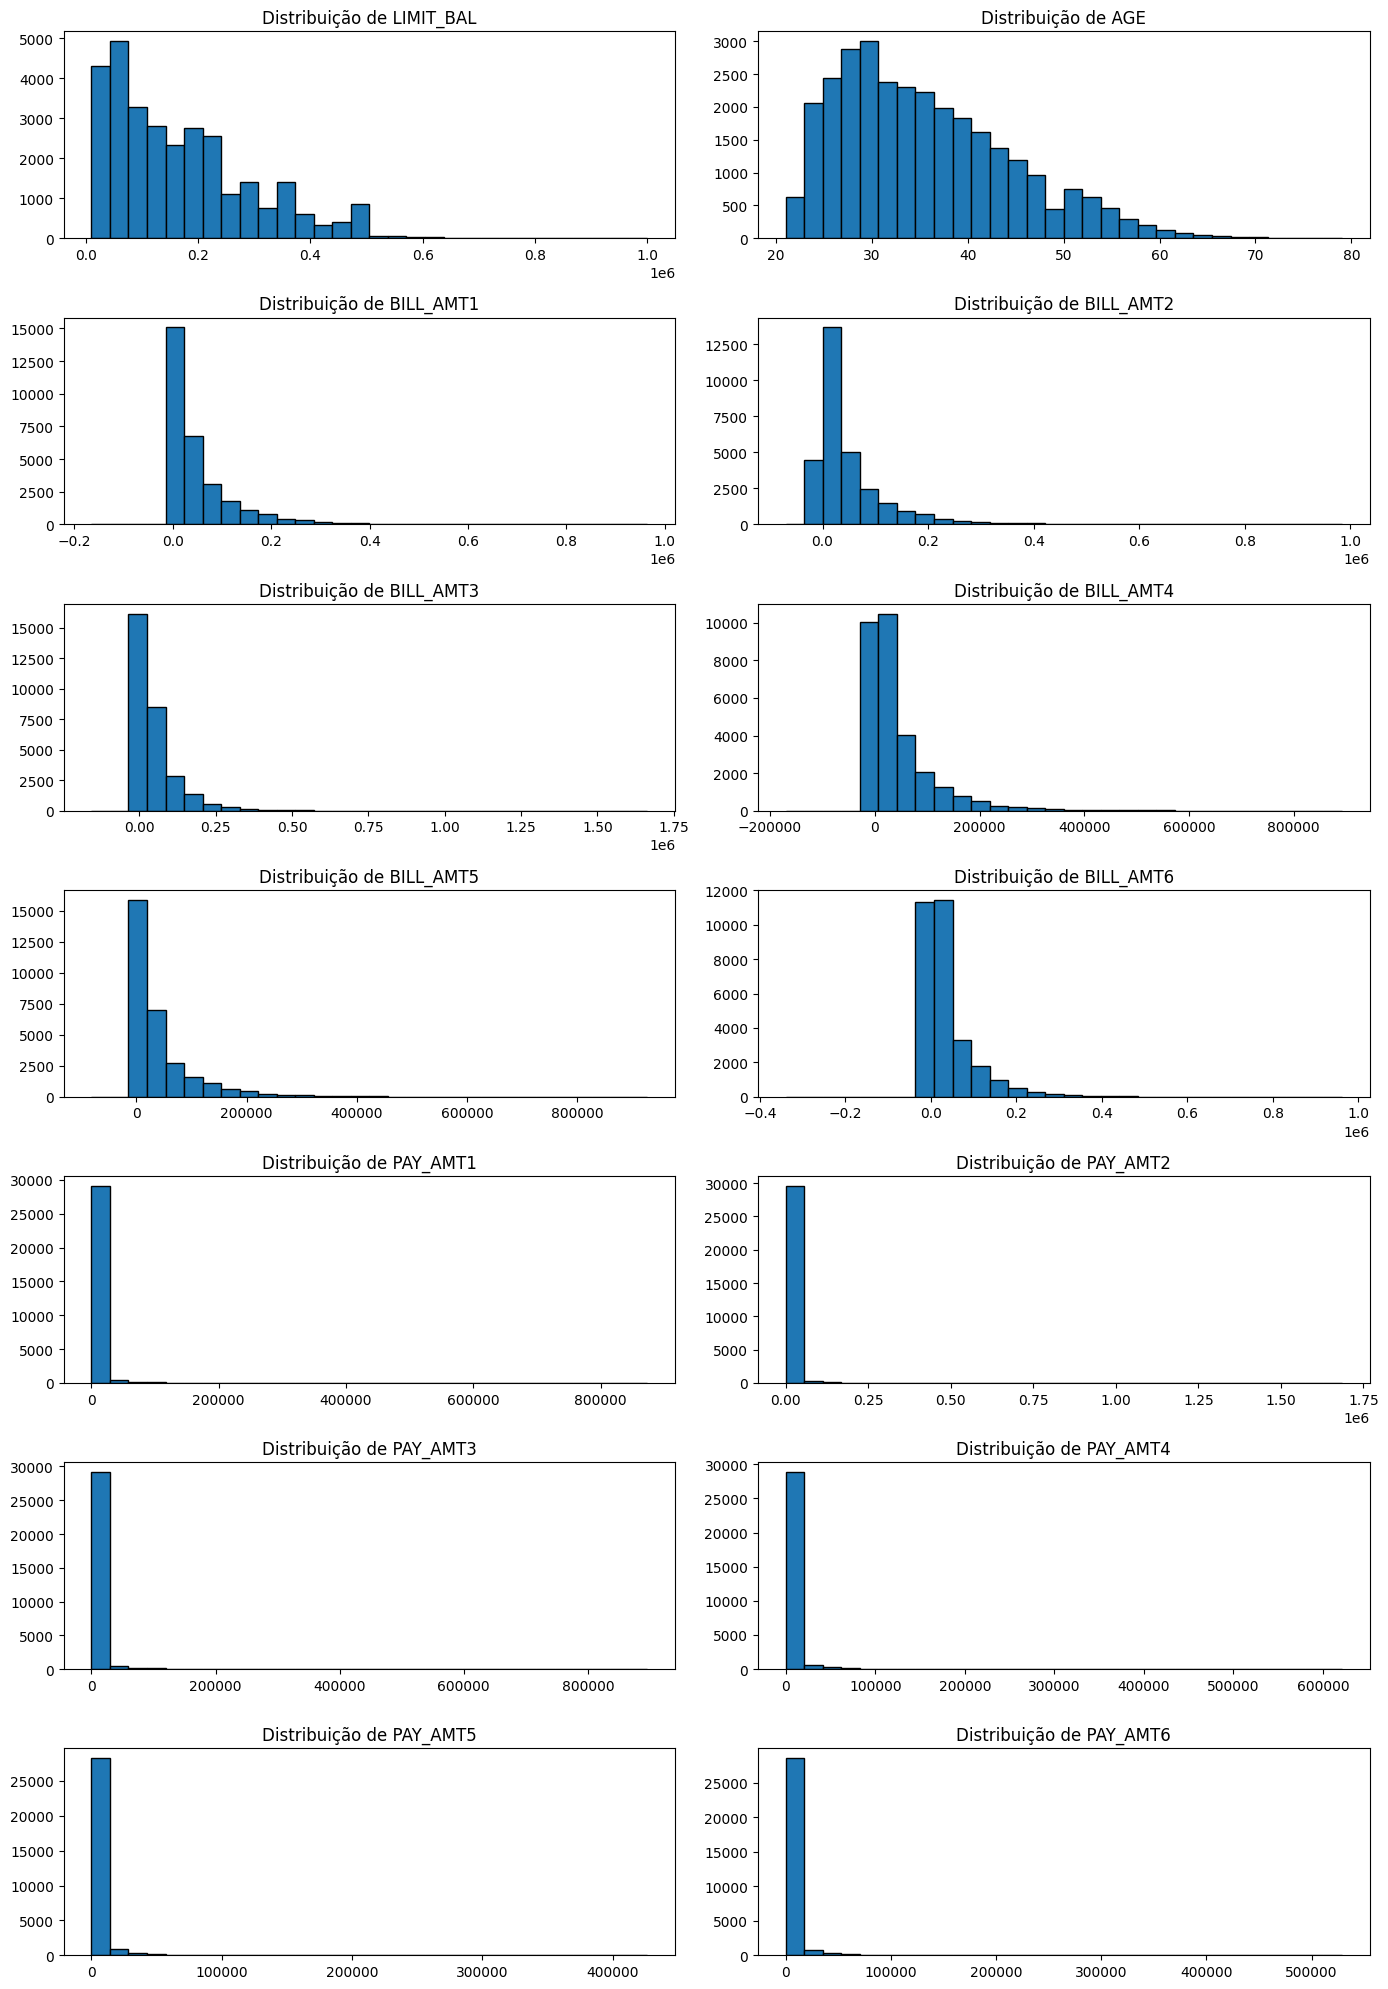

In [16]:
# Histogramas para as features numéricas
numerical_cols = ['LIMIT_BAL', 'AGE'] + [f'BILL_AMT{i}' for i in range(1, 7)] + [f'PAY_AMT{i}' for i in range(1, 7)]

# Plotando histogramas
fig, axes = plt.subplots(len(numerical_cols) // 2, 2, figsize=(14, 20))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
  axes[i].hist(dataset[col], bins=30, edgecolor='black')
  axes[i].set_title(f'Distribuição de {col}')
plt.tight_layout()
plt.show()

In [17]:
# Análise da distribuição e identificação de outliers
def plot_distribution_and_outliers(df, column):
  plt.figure(figsize=(10, 5))
  sns.boxplot(x=df[column])
  plt.title(f"Distribuição de {column}")
  plt.show()

  # Identificar outliers usando IQR
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

  # Imprimir resultados
  print(f"Coluna: {column}")
  print(f"Min: {df[column].min()}")
  print(f"Max: {df[column].max()}")
  print(f"Mean: {df[column].mean()}")
  print(f"Median: {df[column].median()}")
  print(f"Std: {df[column].std()}")
  print(f"Q1: {Q1}")
  print(f"Q3: {Q3}")
  print(f"IQR: {IQR}")
  print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
  print(f"Number of Outliers: {len(outliers)}")
  print(f"% de Outliers: {len(outliers) / len(df) * 100:.2f}%")
  print("\n")

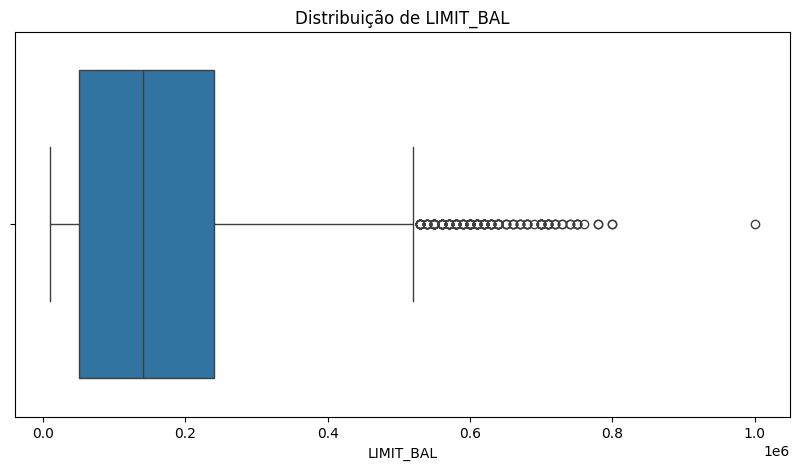

Coluna: LIMIT_BAL
Min: 10000.0
Max: 1000000.0
Mean: 167484.32266666667
Median: 140000.0
Std: 129747.66156720239
Q1: 50000.0
Q3: 240000.0
IQR: 190000.0
Lower Bound: -235000.0, Upper Bound: 525000.0
Number of Outliers: 167
% de Outliers: 0.56%




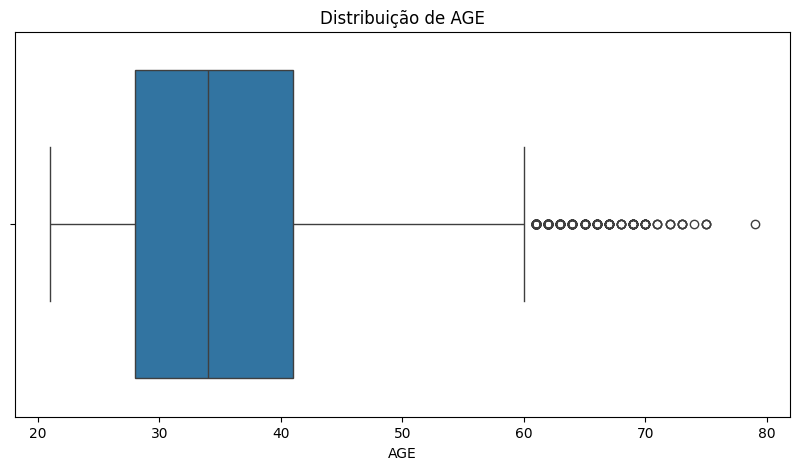

Coluna: AGE
Min: 21
Max: 79
Mean: 35.4855
Median: 34.0
Std: 9.217904068090188
Q1: 28.0
Q3: 41.0
IQR: 13.0
Lower Bound: 8.5, Upper Bound: 60.5
Number of Outliers: 272
% de Outliers: 0.91%




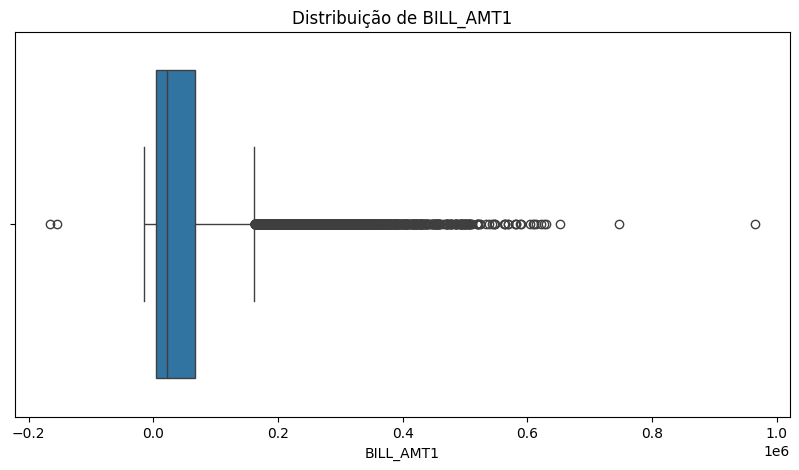

Coluna: BILL_AMT1
Min: -165580.0
Max: 964511.0
Mean: 51223.3309
Median: 22381.5
Std: 73635.86057552956
Q1: 3558.75
Q3: 67091.0
IQR: 63532.25
Lower Bound: -91739.625, Upper Bound: 162389.375
Number of Outliers: 2400
% de Outliers: 8.00%




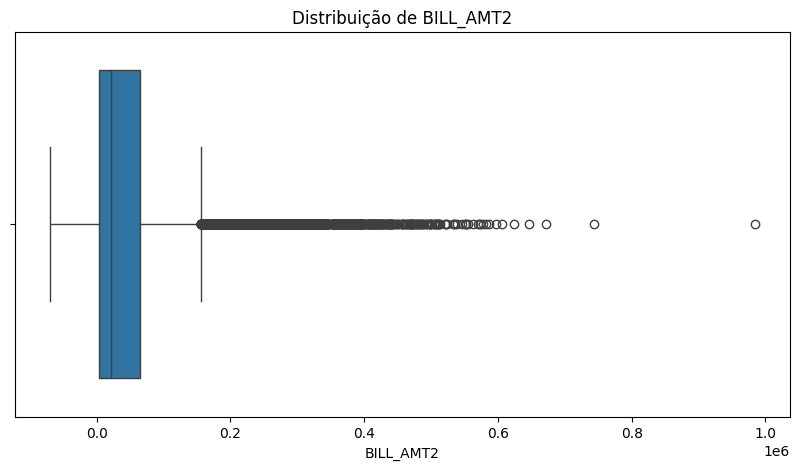

Coluna: BILL_AMT2
Min: -69777.0
Max: 983931.0
Mean: 49179.07516666667
Median: 21200.0
Std: 71173.76878252835
Q1: 2984.75
Q3: 64006.25
IQR: 61021.5
Lower Bound: -88547.5, Upper Bound: 155538.5
Number of Outliers: 2395
% de Outliers: 7.98%




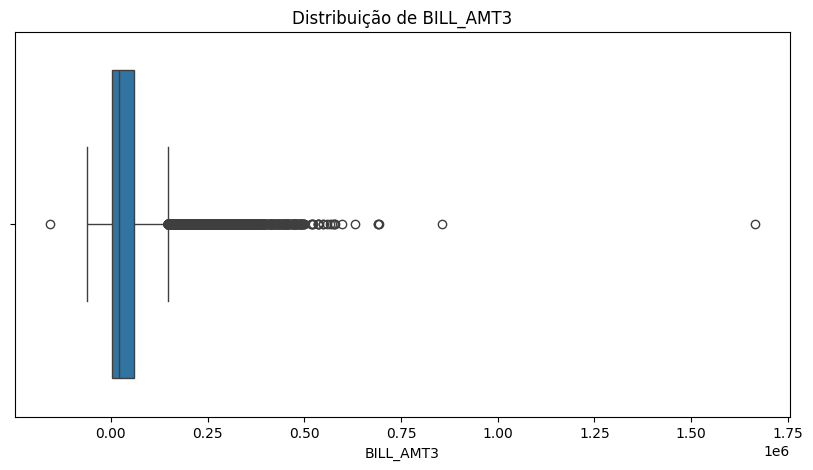

Coluna: BILL_AMT3
Min: -157264.0
Max: 1664089.0
Mean: 47013.1548
Median: 20088.5
Std: 69349.38742703684
Q1: 2666.25
Q3: 60164.75
IQR: 57498.5
Lower Bound: -83581.5, Upper Bound: 146412.5
Number of Outliers: 2469
% de Outliers: 8.23%




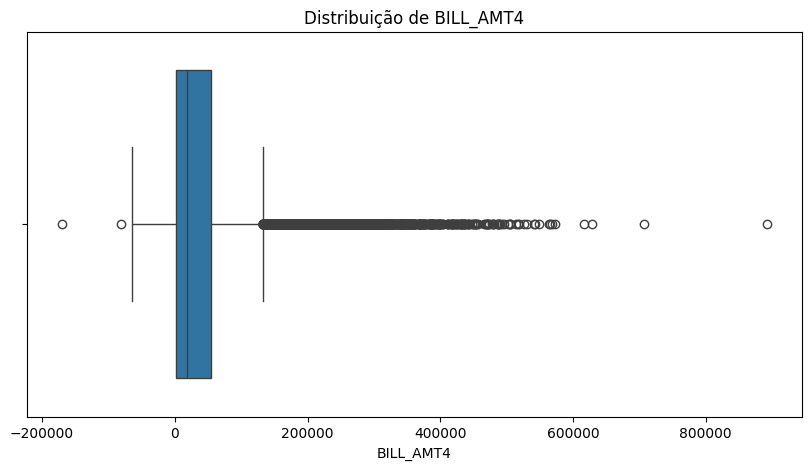

Coluna: BILL_AMT4
Min: -170000.0
Max: 891586.0
Mean: 43262.94896666666
Median: 19052.0
Std: 64332.85613391631
Q1: 2326.75
Q3: 54506.0
IQR: 52179.25
Lower Bound: -75942.125, Upper Bound: 132774.875
Number of Outliers: 2622
% de Outliers: 8.74%




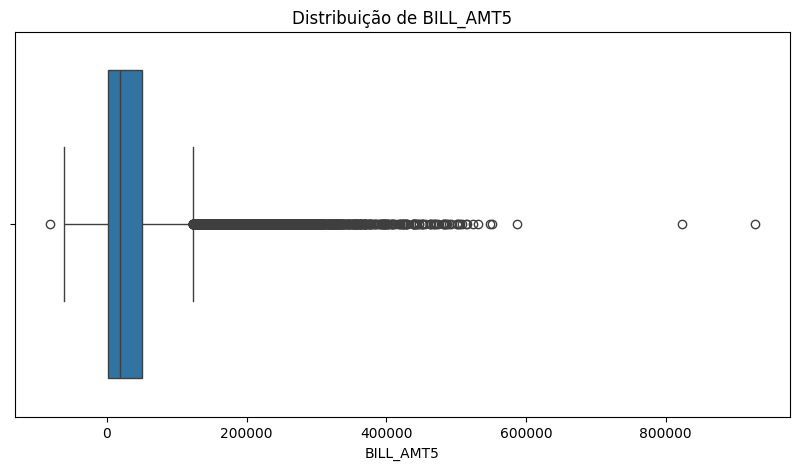

Coluna: BILL_AMT5
Min: -81334.0
Max: 927171.0
Mean: 40311.40096666667
Median: 18104.5
Std: 60797.15577026487
Q1: 1763.0
Q3: 50190.5
IQR: 48427.5
Lower Bound: -70878.25, Upper Bound: 122831.75
Number of Outliers: 2725
% de Outliers: 9.08%




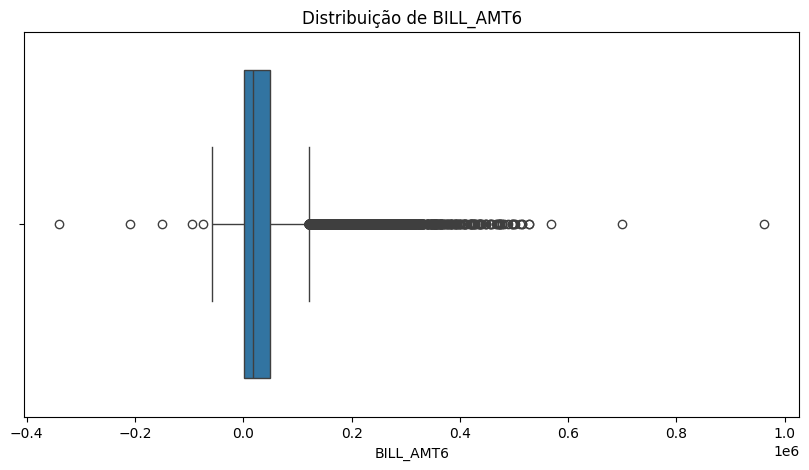

Coluna: BILL_AMT6
Min: -339603.0
Max: 961664.0
Mean: 38871.7604
Median: 17071.0
Std: 59554.10753674573
Q1: 1256.0
Q3: 49198.25
IQR: 47942.25
Lower Bound: -70657.375, Upper Bound: 121111.625
Number of Outliers: 2693
% de Outliers: 8.98%




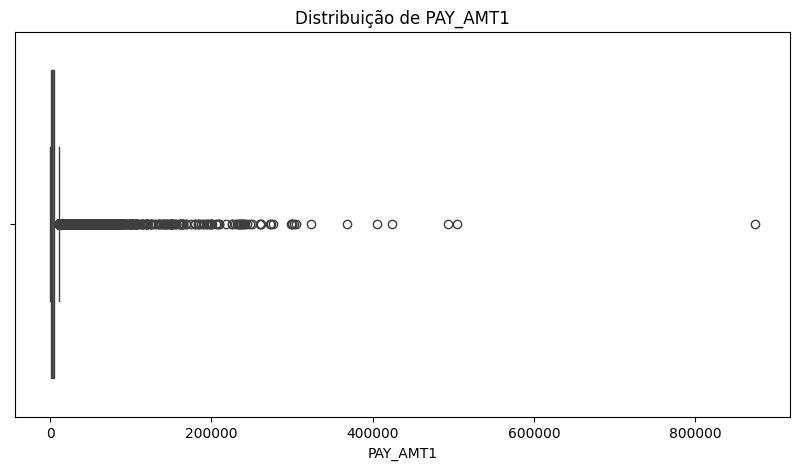

Coluna: PAY_AMT1
Min: 0.0
Max: 873552.0
Mean: 5663.5805
Median: 2100.0
Std: 16563.280354025766
Q1: 1000.0
Q3: 5006.0
IQR: 4006.0
Lower Bound: -5009.0, Upper Bound: 11015.0
Number of Outliers: 2745
% de Outliers: 9.15%




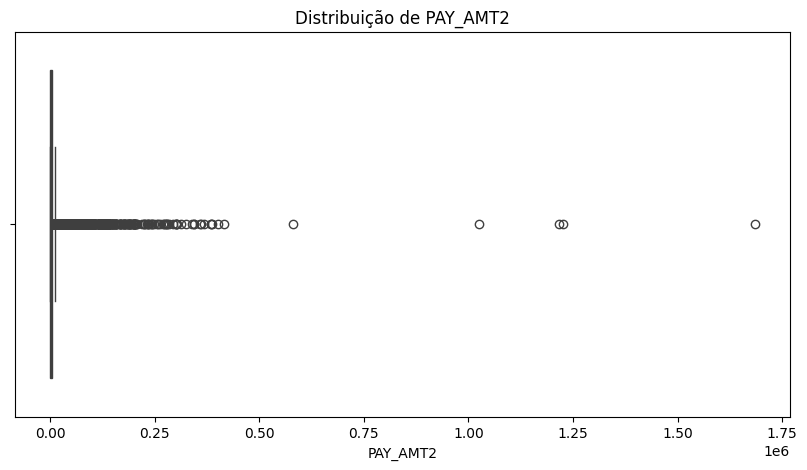

Coluna: PAY_AMT2
Min: 0.0
Max: 1684259.0
Mean: 5921.1635
Median: 2009.0
Std: 23040.87040205724
Q1: 833.0
Q3: 5000.0
IQR: 4167.0
Lower Bound: -5417.5, Upper Bound: 11250.5
Number of Outliers: 2714
% de Outliers: 9.05%




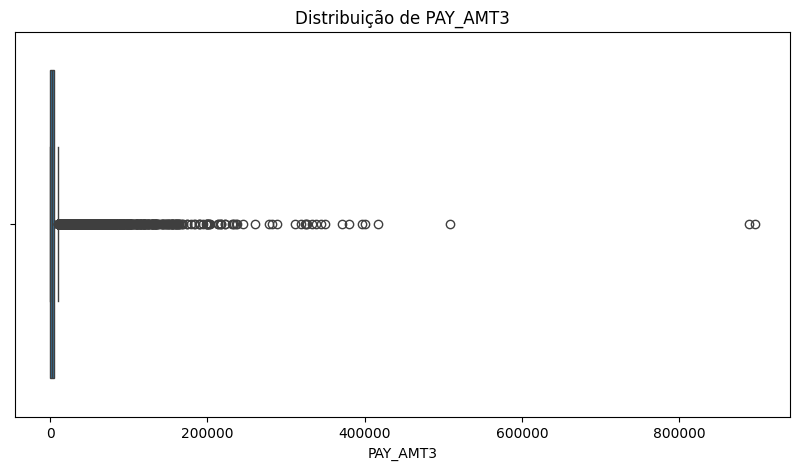

Coluna: PAY_AMT3
Min: 0.0
Max: 896040.0
Mean: 5225.6815
Median: 1800.0
Std: 17606.961469803104
Q1: 390.0
Q3: 4505.0
IQR: 4115.0
Lower Bound: -5782.5, Upper Bound: 10677.5
Number of Outliers: 2598
% de Outliers: 8.66%




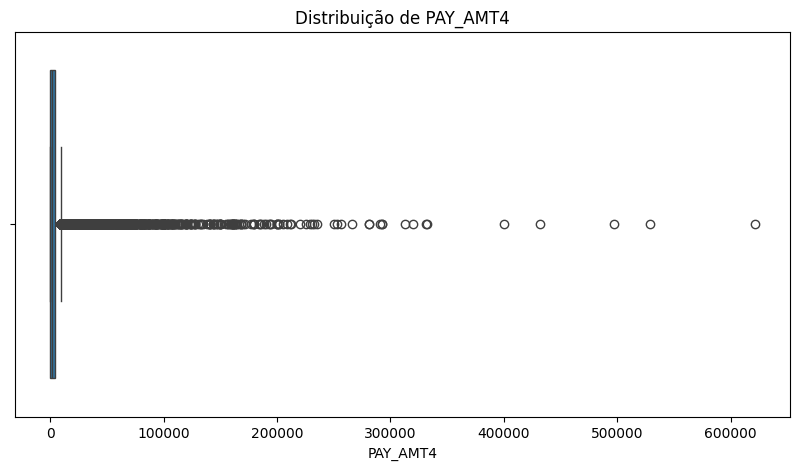

Coluna: PAY_AMT4
Min: 0.0
Max: 621000.0
Mean: 4826.076866666666
Median: 1500.0
Std: 15666.159744032007
Q1: 296.0
Q3: 4013.25
IQR: 3717.25
Lower Bound: -5279.875, Upper Bound: 9589.125
Number of Outliers: 2994
% de Outliers: 9.98%




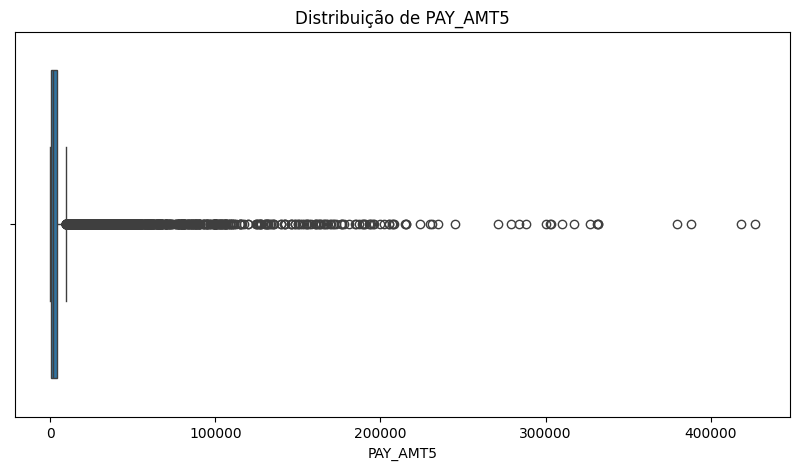

Coluna: PAY_AMT5
Min: 0.0
Max: 426529.0
Mean: 4799.387633333334
Median: 1500.0
Std: 15278.305679144789
Q1: 252.5
Q3: 4031.5
IQR: 3779.0
Lower Bound: -5416.0, Upper Bound: 9700.0
Number of Outliers: 2945
% de Outliers: 9.82%




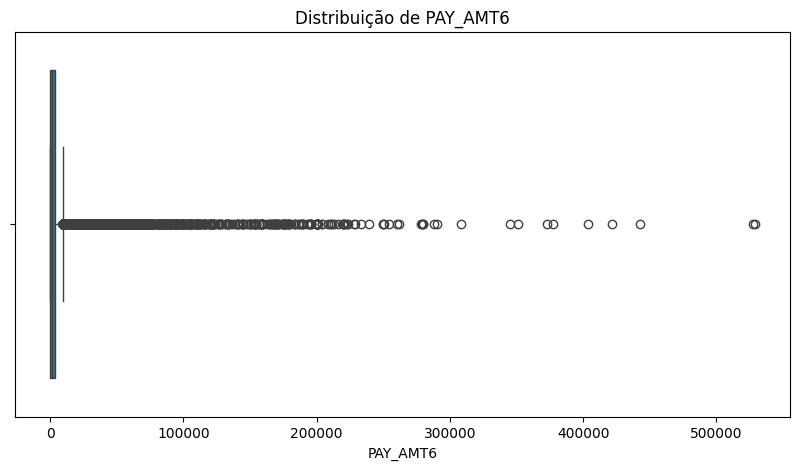

Coluna: PAY_AMT6
Min: 0.0
Max: 528666.0
Mean: 5215.502566666667
Median: 1500.0
Std: 17777.4657754353
Q1: 117.75
Q3: 4000.0
IQR: 3882.25
Lower Bound: -5705.625, Upper Bound: 9823.375
Number of Outliers: 2958
% de Outliers: 9.86%




In [18]:
for column in numerical_cols:
  plot_distribution_and_outliers(dataset, column)

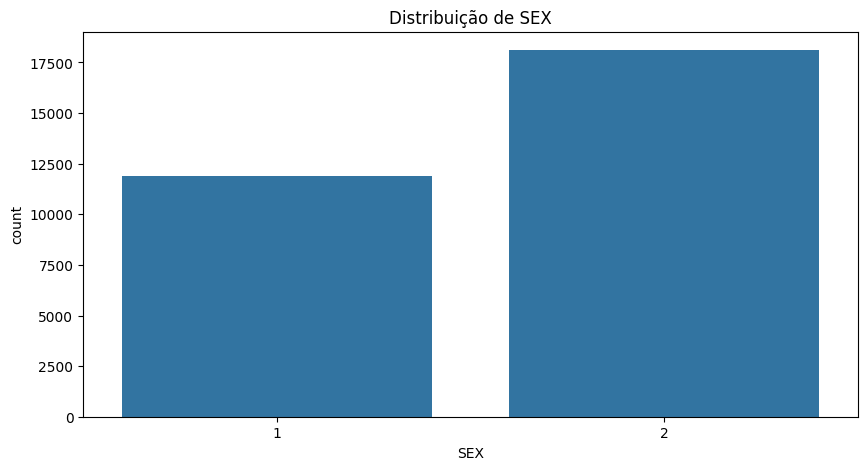

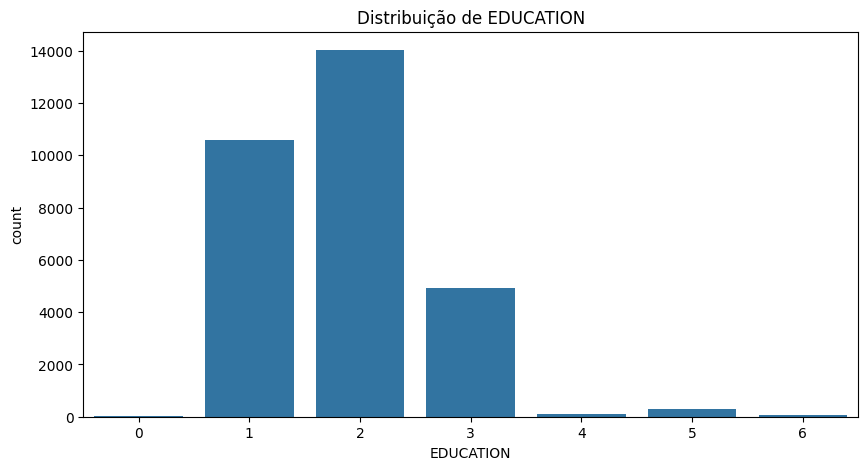

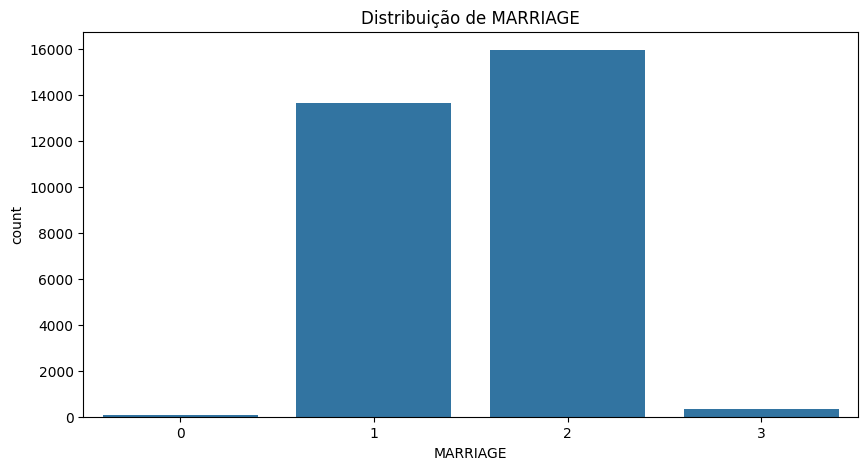

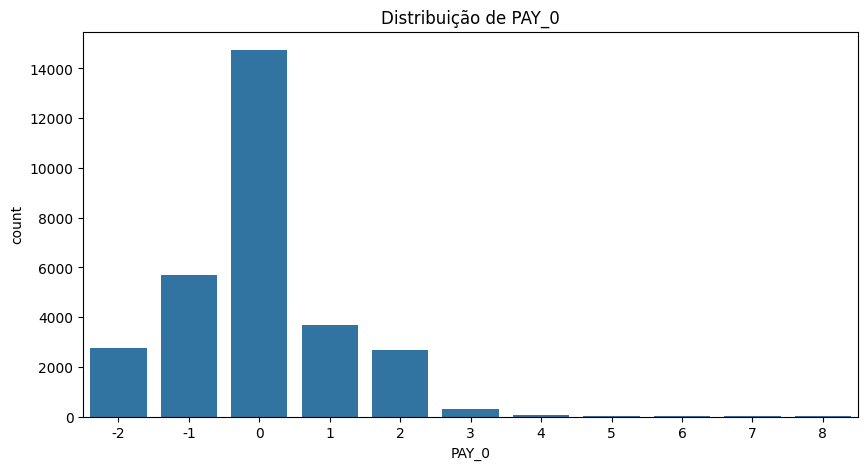

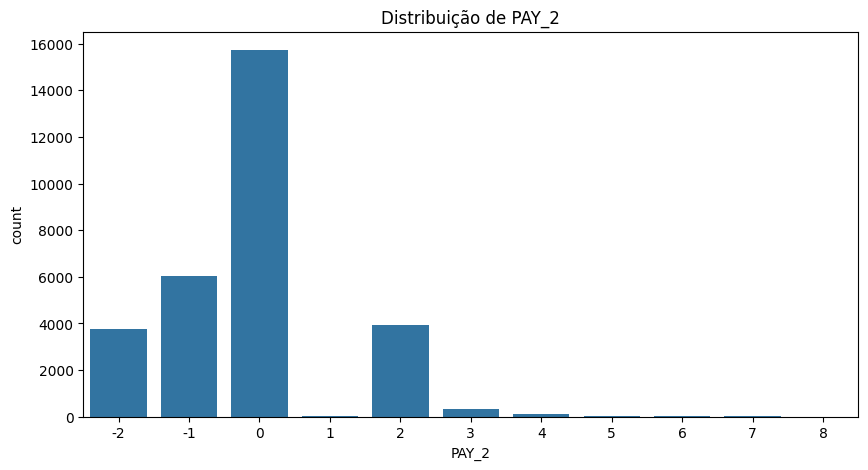

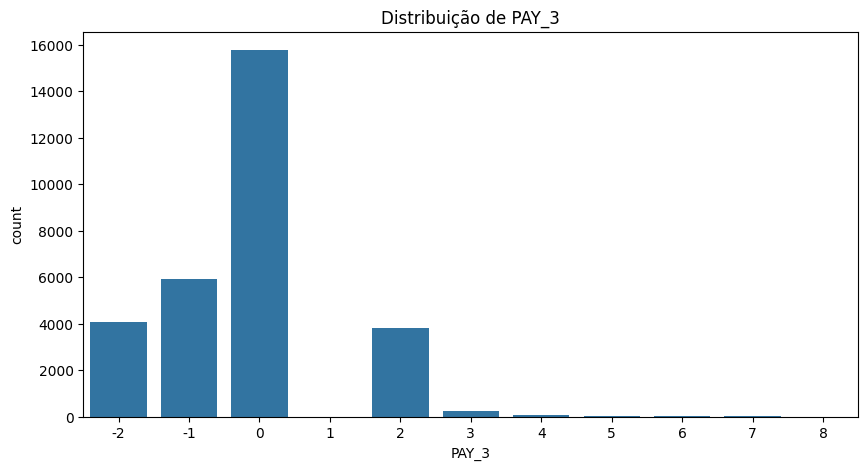

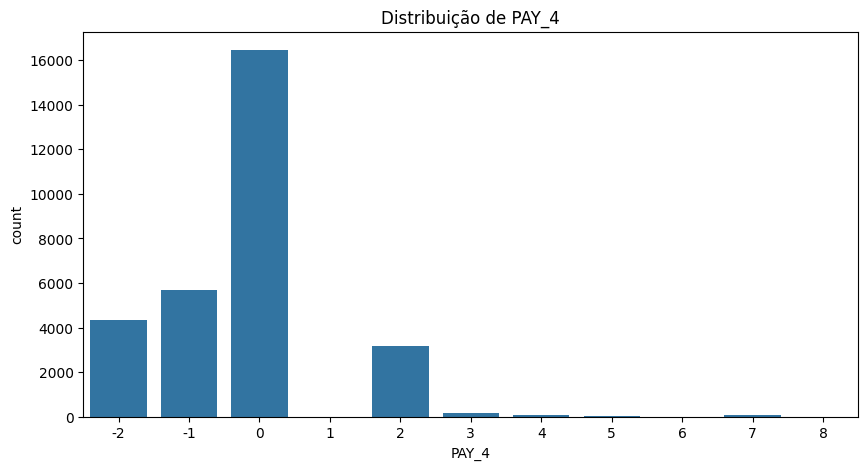

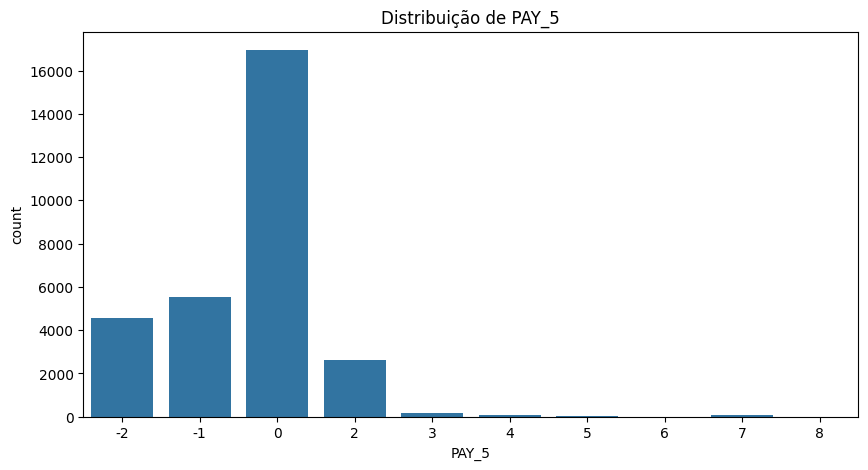

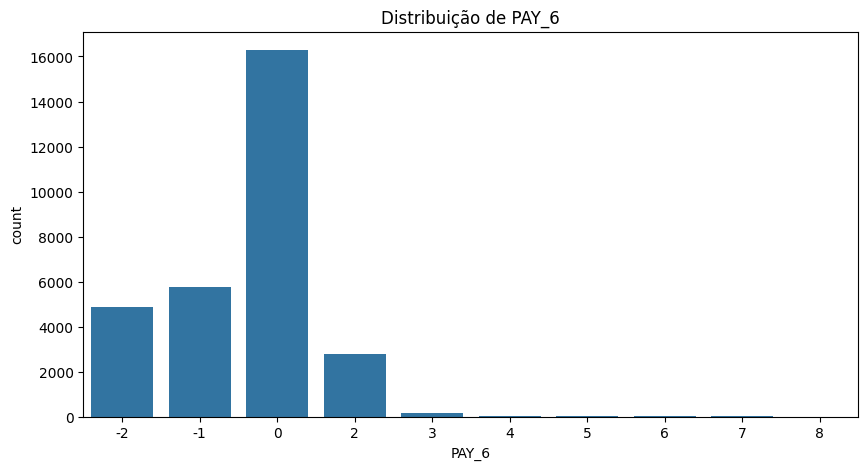

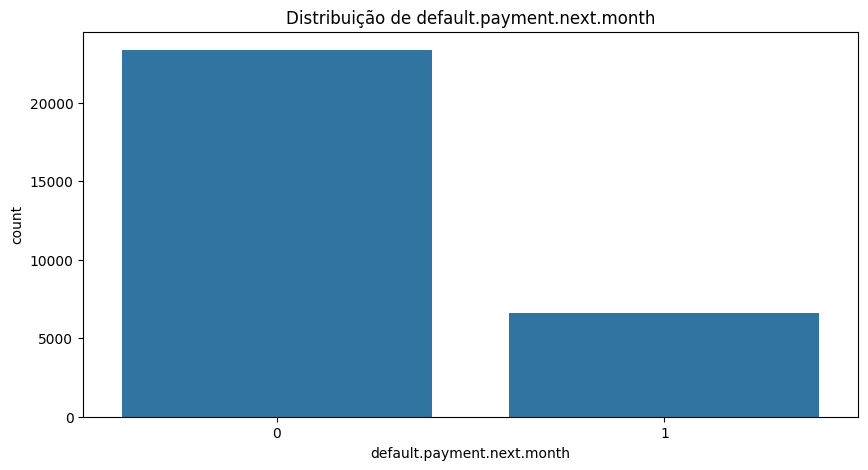

In [19]:
# Analisar a distribuição das variáveis categóricas
categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                       'default.payment.next.month']

for column in categorical_columns:
  plt.figure(figsize=(10, 5))
  sns.countplot(x=dataset[column])
  plt.title(f"Distribuição de {column}")
  plt.show()

## d) Qual a correlação de cada feature com o alvo?

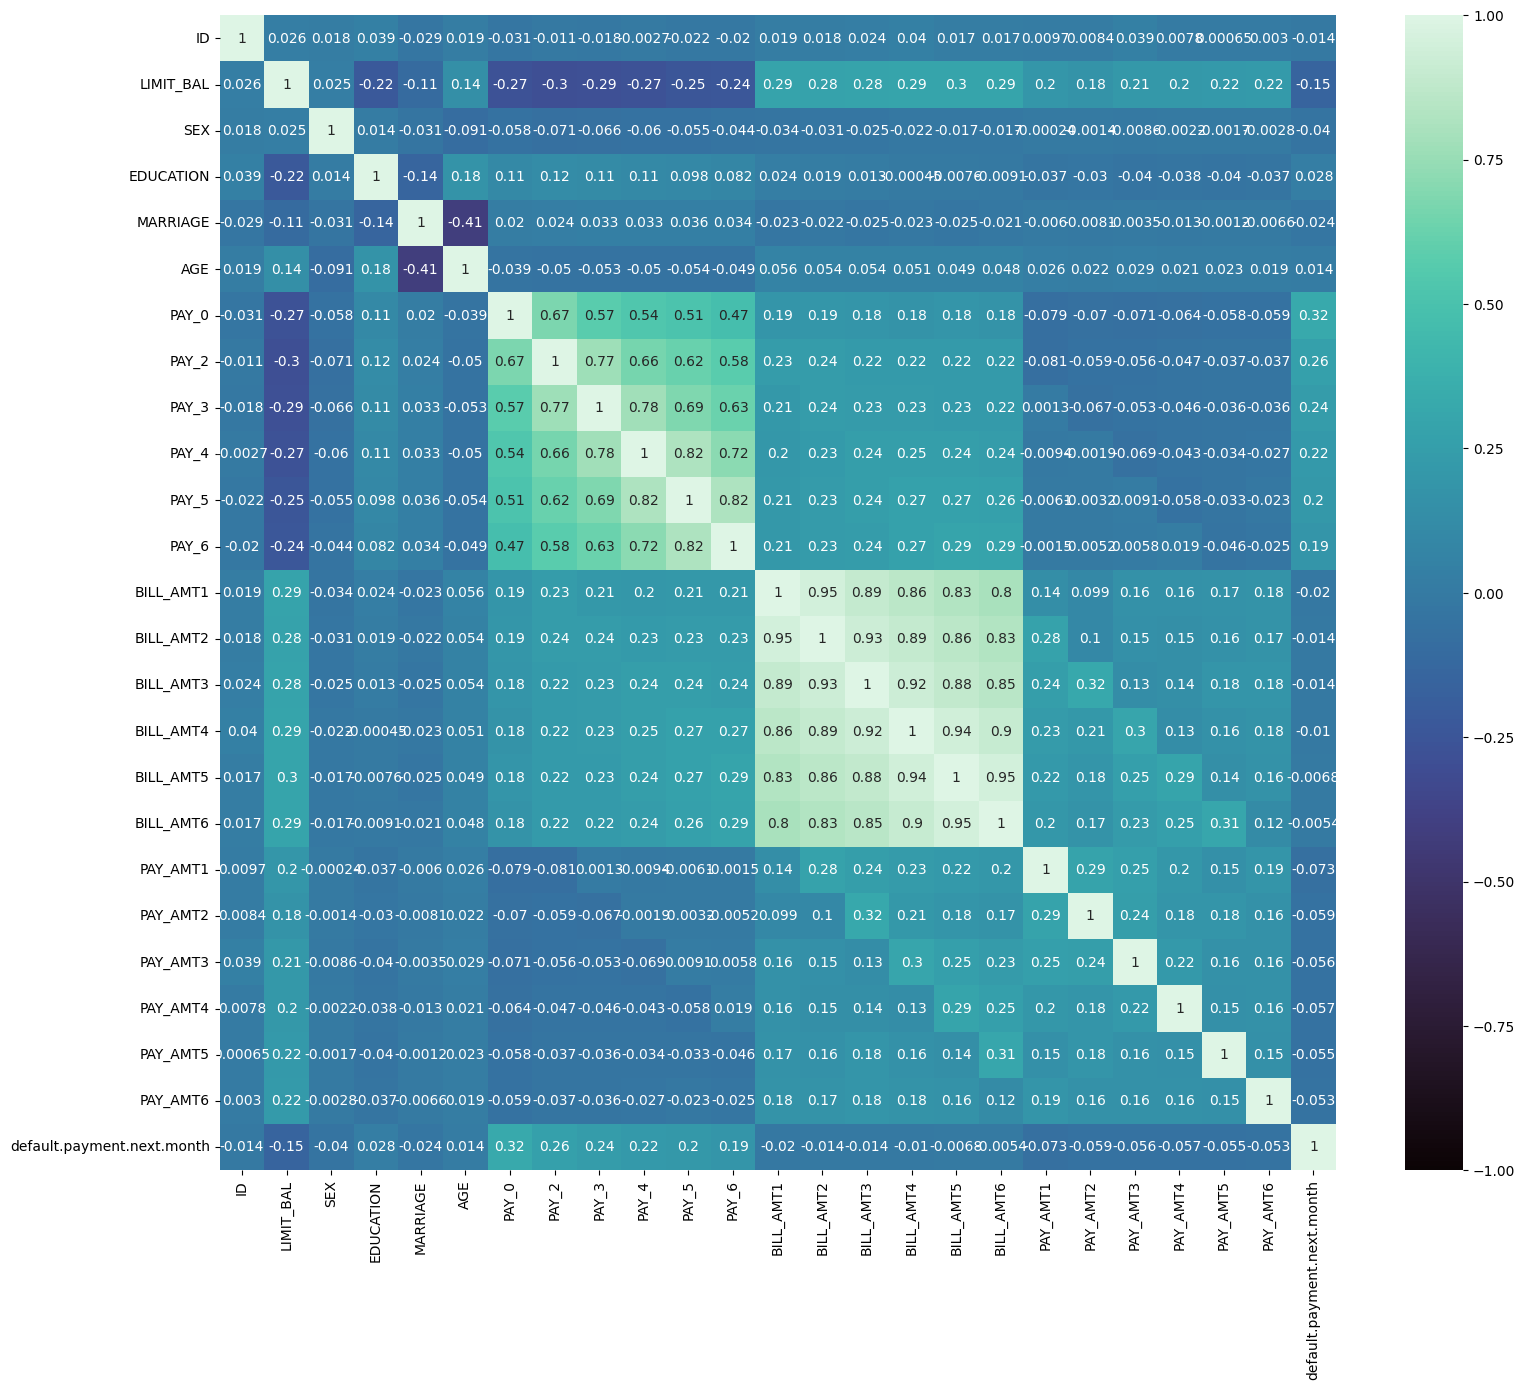

In [20]:
corr = dataset.corr()
plt.figure(figsize=(18,15))
sns.heatmap(corr,annot=True,vmin=-1.0,cmap="mako")
plt.show()



1.   Correlação com default.payment.next.month:

* As correlações com default.payment.next.month são geralmente baixas, indicando que nenhuma features tem uma correlação forte com a inadimplência do próximo mês.
* As variáveis PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, e PAY_6 possuem correlações positivas ligeiramente mais altas (em relação as outras features) com default.payment.next.month (variando de cerca de 0.15 a 0.32), sugerindo que atrasos nos pagamentos anteriores são indicadores de risco de inadimplência.
* LIMIT_BAL (limite de crédito) tem uma correlação negativa ligeiramente mais alta com default.payment.next.month (-0.15), sugerindo que limites de crédito mais altos podem estar associados a menores chances de inadimplência.
*AGE tem uma correlação muito baixa com a inadimplência, indicando que a idade dos clientes não é um bom preditor de inadimplência neste dataset.
*SEX, EDUCATION, e MARRIAGE também apresentam correlações muito baixas com o alvo, sugerindo que estas variáveis demográficas são menos informativas sobre a inadimplência.
2.   Correlações entre variáveis
* As features PAY_* estão correlacionadas razoavelmente entre si, indicando que os atrasos em um mês estão frequentemente associados a atrasos em outros meses.
* As BILL_AMT* também apresentam alta correlação entre si, sugerindo que os saldos das faturas são consistentes ao longo dos meses.



# 2 - Realize uma seleção das features relevantes para o problema;

In [21]:
colunasA = []
for coluna in dataset.columns:
    if (coluna != 'default.payment.next.month' and coluna != 'ID' ):
        colunasA.append(coluna)

In [22]:
train_df, val_df = train_test_split(dataset, test_size=0.20, random_state=2018, shuffle=True)
target = 'default.payment.next.month'
clf = RandomForestClassifier(n_jobs=4, random_state=2018,criterion='gini',n_estimators=100,verbose=False)
clf.fit(train_df[colunasA], train_df['default.payment.next.month'].values)


RandomForestClassifier(n_jobs=4, random_state=2018, verbose=False)

C:\Users\prude\AppData\Local\Temp\ipykernel_34276\416723524.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


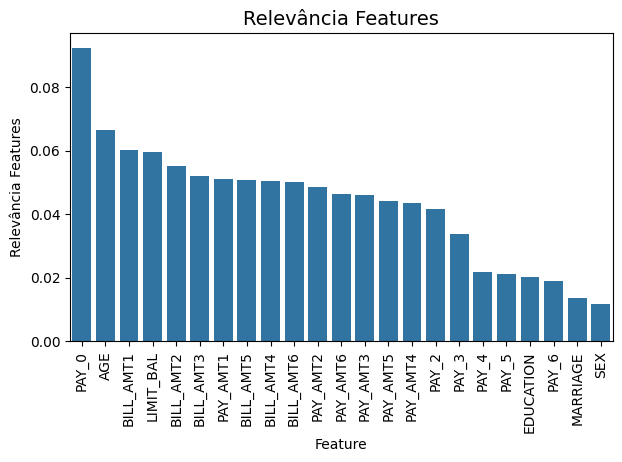

In [23]:
tmp = pd.DataFrame({'Feature': colunasA , 'Relevância Features': clf.feature_importances_})
tmp = tmp.sort_values(by='Relevância Features',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Relevância Features',fontsize=14)
s = sns.barplot(x='Feature',y='Relevância Features',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

#3 - Faça tratamento nas features selecionadas envolvendo:

## a) Remoção de valores nulos;

Não há valores nulos no dataset

## b)Remoção de outliers;

In [24]:
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()


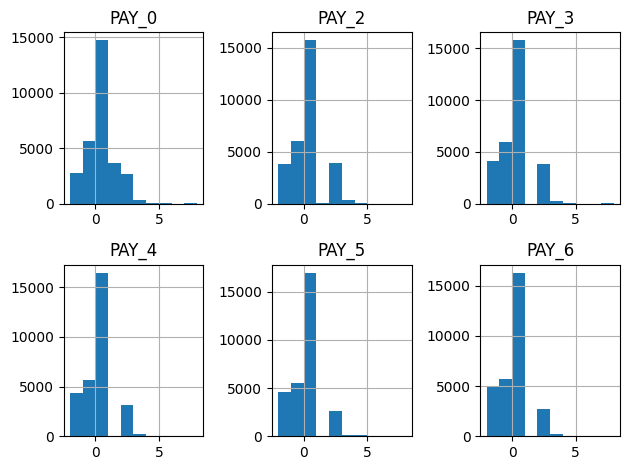

In [25]:
late = dataset[['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)


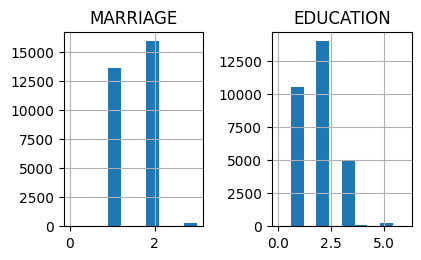

In [26]:
MandE = dataset[['MARRIAGE','EDUCATION']]
draw_histograms(MandE, MandE.columns, 2, 3, 10)

In [27]:
dataset.MARRIAGE.value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [28]:
fil = (dataset['MARRIAGE'] == 0)
dataset.loc[fil, 'MARRIAGE'] = 3
dataset['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

In [29]:
dataset.EDUCATION.value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [30]:
fil = (dataset.EDUCATION == 5) | (dataset.EDUCATION == 6) | (dataset.EDUCATION == 0)
dataset.loc[fil, 'EDUCATION'] = 4
dataset.EDUCATION.value_counts()

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

In [31]:
fil = (dataset.PAY_0 == -2)
dataset.loc[fil, 'PAY_0'] = 0
fil = (dataset.PAY_2 == -2)
dataset.loc[fil, 'PAY_2'] = 0
fil = (dataset.PAY_3 == -2)
dataset.loc[fil, 'PAY_3'] = 0
fil = (dataset.PAY_4 == -2)
dataset.loc[fil, 'PAY_4'] = 0
fil = (dataset.PAY_5 == -2)
dataset.loc[fil, 'PAY_5'] = 0
fil = (dataset.PAY_6 == -2)
dataset.loc[fil, 'PAY_6'] = 0


In [32]:
unique_values = dataset[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].apply(lambda x: sorted(x.unique()))
unique_values

PAY_0    [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_2    [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_3    [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_4    [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_5       [-1, 0, 2, 3, 4, 5, 6, 7, 8]
PAY_6       [-1, 0, 2, 3, 4, 5, 6, 7, 8]
dtype: object

##### VALORES DE PAY_0 ATÉ PAY_6

In [33]:
dataset.PAY_0.value_counts()

PAY_0
 0    17496
-1     5686
 1     3688
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: count, dtype: int64

In [34]:
dataset.PAY_2.value_counts()

PAY_2
 0    19512
-1     6050
 2     3927
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: count, dtype: int64

In [35]:
dataset.PAY_3.value_counts()

PAY_3
 0    19849
-1     5938
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: count, dtype: int64

In [36]:
dataset.PAY_4.value_counts()

PAY_4
 0    20803
-1     5687
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: count, dtype: int64

In [37]:
dataset.PAY_5.value_counts()

PAY_5
 0    21493
-1     5539
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: count, dtype: int64

In [38]:
dataset.PAY_6.value_counts()

PAY_6
 0    21181
-1     5740
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: count, dtype: int64

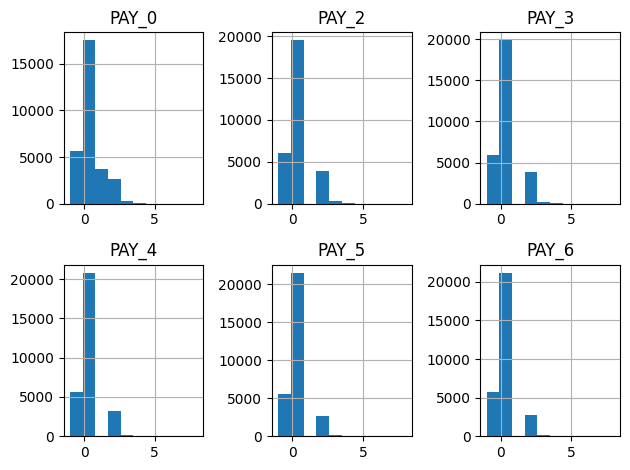

In [39]:
late = dataset[['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

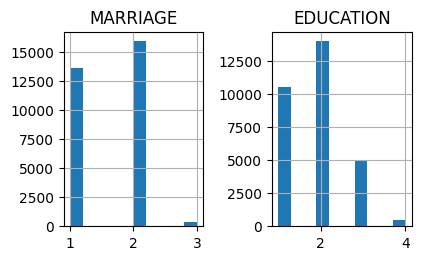

In [40]:
MandE = dataset[['MARRIAGE','EDUCATION']]
draw_histograms(MandE, MandE.columns, 2, 3, 10)

### c) Conversão de features categóricas para numéricas;


### d) Normalização das features;

In [41]:
scaler = StandardScaler()
dataset[numerical_cols] = scaler.fit_transform(dataset[numerical_cols])
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,-1.136720,2,2,1,-1.246020,2,2,-1,-1,...,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1
1,2,-0.365981,2,2,2,-1.029047,-1,2,0,0,...,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1
2,3,-0.597202,2,2,2,-0.161156,0,0,0,0,...,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0
3,4,-0.905498,2,2,1,0.164303,0,0,0,0,...,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0
4,5,-0.905498,1,2,1,2.334029,-1,0,-1,0,...,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0


# 4- Considere a criação de novas features, a partir das features existentes.

In [42]:
# Relação entre valores de extrato e limites de crédito
dataset['BILL_LIMIT_RATIO1'] = dataset['BILL_AMT1'] / dataset['LIMIT_BAL']
dataset['BILL_LIMIT_RATIO2'] = dataset['BILL_AMT2'] / dataset['LIMIT_BAL']
dataset['BILL_LIMIT_RATIO3'] = dataset['BILL_AMT3'] / dataset['LIMIT_BAL']
dataset['BILL_LIMIT_RATIO4'] = dataset['BILL_AMT4'] / dataset['LIMIT_BAL']
dataset['BILL_LIMIT_RATIO5'] = dataset['BILL_AMT5'] / dataset['LIMIT_BAL']
dataset['BILL_LIMIT_RATIO6'] = dataset['BILL_AMT6'] / dataset['LIMIT_BAL']
dataset.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,BILL_LIMIT_RATIO1,BILL_LIMIT_RATIO2,BILL_LIMIT_RATIO3,BILL_LIMIT_RATIO4,BILL_LIMIT_RATIO5,BILL_LIMIT_RATIO6
0,1,-1.136720,2,2,1,-1.246020,2,2,-1,-1,...,-0.308063,-0.314136,-0.293382,1,0.565224,0.569533,0.587650,0.591612,0.583309,0.574217
1,2,-0.365981,2,2,2,-1.029047,-1,2,0,0,...,-0.244230,-0.314136,-0.180878,1,1.801240,1.821809,1.746689,1.698549,1.656452,1.633875
2,3,-0.597202,2,2,2,-0.161156,0,0,0,0,...,-0.244230,-0.248683,-0.012122,0,0.499930,0.827021,0.807780,0.753062,0.698570,0.655774
3,4,-0.905498,2,2,1,0.164303,0,0,0,0,...,-0.237846,-0.244166,-0.237130,0,0.063491,0.014680,-0.036274,0.256624,0.206217,0.172920
4,5,-0.905498,1,2,1,2.334029,-1,0,-1,0,...,0.266434,-0.269039,-0.255187,0,0.639005,0.675118,0.178011,0.383211,0.384470,0.366076


In [43]:
# Diferenças entre valores de extrato de diferentes meses
dataset['BILL_DIFF12'] = dataset['BILL_AMT1'] - dataset['BILL_AMT2']
dataset['BILL_DIFF23'] = dataset['BILL_AMT2'] - dataset['BILL_AMT3']
dataset['BILL_DIFF34'] = dataset['BILL_AMT3'] - dataset['BILL_AMT4']
dataset['BILL_DIFF45'] = dataset['BILL_AMT4'] - dataset['BILL_AMT5']
dataset['BILL_DIFF56'] = dataset['BILL_AMT5'] - dataset['BILL_AMT6']
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_LIMIT_RATIO2,BILL_LIMIT_RATIO3,BILL_LIMIT_RATIO4,BILL_LIMIT_RATIO5,BILL_LIMIT_RATIO6,BILL_DIFF12,BILL_DIFF23,BILL_DIFF34,BILL_DIFF45,BILL_DIFF56
0,1,-1.136720,2,2,1,-1.246020,2,2,-1,-1,...,0.569533,0.587650,0.591612,0.583309,0.574217,0.004898,0.020594,0.004504,-0.009439,-0.010334
1,2,-0.365981,2,2,2,-1.029047,-1,2,0,0,...,1.821809,1.746689,1.698549,1.656452,1.633875,0.007528,-0.027492,-0.017618,-0.015407,-0.008263
2,3,-0.597202,2,2,2,-0.161156,0,0,0,0,...,0.827021,0.807780,0.753062,0.698570,0.655774,0.195339,-0.011491,-0.032678,-0.032543,-0.025558
3,4,-0.905498,2,2,1,0.164303,0,0,0,0,...,0.014680,-0.036274,0.256624,0.206217,0.172920,-0.044198,-0.046139,0.265219,-0.045644,-0.030150
4,5,-0.905498,1,2,1,2.334029,-1,0,-1,0,...,0.675118,0.178011,0.383211,0.384470,0.366076,0.032700,-0.450129,0.185808,0.001140,-0.016656


In [44]:
#Diferenças entre valores de pagamento de diferentes meses
dataset['PAY_DIFF12'] = dataset['PAY_AMT1'] - dataset['PAY_AMT2']
dataset['PAY_DIFF23'] = dataset['PAY_AMT2'] - dataset['PAY_AMT3']
dataset['PAY_DIFF34'] = dataset['PAY_AMT3'] - dataset['PAY_AMT4']
dataset['PAY_DIFF45'] = dataset['PAY_AMT4'] - dataset['PAY_AMT5']
dataset['PAY_DIFF56'] = dataset['PAY_AMT5'] - dataset['PAY_AMT6']
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_DIFF12,BILL_DIFF23,BILL_DIFF34,BILL_DIFF45,BILL_DIFF56,PAY_DIFF12,PAY_DIFF23,PAY_DIFF34,PAY_DIFF45,PAY_DIFF56
0,1,-1.136720,2,2,1,-1.246020,2,2,-1,-1,...,0.004898,0.020594,0.004504,-0.009439,-0.010334,-0.114856,0.069716,0.011261,0.006074,-0.020754
1,2,-0.365981,2,2,2,-1.029047,-1,2,0,0,...,0.007528,-0.027492,-0.017618,-0.015407,-0.008263,-0.128354,0.026417,0.004225,0.069906,-0.133258
2,3,-0.597202,2,2,2,-0.161156,0,0,0,0,...,0.195339,-0.011491,-0.032678,-0.032543,-0.025558,-0.058405,0.048118,0.004225,0.004453,-0.236560
3,4,-0.905498,2,2,1,0.164303,0,0,0,0,...,-0.044198,-0.046139,0.265219,-0.045644,-0.030150,-0.051829,0.059284,0.009201,0.006320,-0.007036
4,5,-0.905498,1,2,1,2.334029,-1,0,-1,0,...,0.032700,-0.450129,0.185808,0.001140,-0.016656,-1.556225,1.063869,0.004732,0.535472,-0.013852


In [45]:
# Histórico de atraso nos pagamentos:
dataset['TOTAL_LATE_MONTHS'] = (dataset[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']] > 0).sum(axis=1)
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_DIFF23,BILL_DIFF34,BILL_DIFF45,BILL_DIFF56,PAY_DIFF12,PAY_DIFF23,PAY_DIFF34,PAY_DIFF45,PAY_DIFF56,TOTAL_LATE_MONTHS
0,1,-1.136720,2,2,1,-1.246020,2,2,-1,-1,...,0.020594,0.004504,-0.009439,-0.010334,-0.114856,0.069716,0.011261,0.006074,-0.020754,2
1,2,-0.365981,2,2,2,-1.029047,-1,2,0,0,...,-0.027492,-0.017618,-0.015407,-0.008263,-0.128354,0.026417,0.004225,0.069906,-0.133258,2
2,3,-0.597202,2,2,2,-0.161156,0,0,0,0,...,-0.011491,-0.032678,-0.032543,-0.025558,-0.058405,0.048118,0.004225,0.004453,-0.236560,0
3,4,-0.905498,2,2,1,0.164303,0,0,0,0,...,-0.046139,0.265219,-0.045644,-0.030150,-0.051829,0.059284,0.009201,0.006320,-0.007036,0
4,5,-0.905498,1,2,1,2.334029,-1,0,-1,0,...,-0.450129,0.185808,0.001140,-0.016656,-1.556225,1.063869,0.004732,0.535472,-0.013852,0


In [46]:
# Preenchendo valores infinitos gerados por divisões por zero com zero
dataset.replace([np.inf, -np.inf], 0, inplace=True)
dataset.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_DIFF23,BILL_DIFF34,BILL_DIFF45,BILL_DIFF56,PAY_DIFF12,PAY_DIFF23,PAY_DIFF34,PAY_DIFF45,PAY_DIFF56,TOTAL_LATE_MONTHS
0,1,-1.136720,2,2,1,-1.246020,2,2,-1,-1,...,0.020594,0.004504,-0.009439,-0.010334,-0.114856,0.069716,0.011261,0.006074,-0.020754,2
1,2,-0.365981,2,2,2,-1.029047,-1,2,0,0,...,-0.027492,-0.017618,-0.015407,-0.008263,-0.128354,0.026417,0.004225,0.069906,-0.133258,2
2,3,-0.597202,2,2,2,-0.161156,0,0,0,0,...,-0.011491,-0.032678,-0.032543,-0.025558,-0.058405,0.048118,0.004225,0.004453,-0.236560,0
3,4,-0.905498,2,2,1,0.164303,0,0,0,0,...,-0.046139,0.265219,-0.045644,-0.030150,-0.051829,0.059284,0.009201,0.006320,-0.007036,0
4,5,-0.905498,1,2,1,2.334029,-1,0,-1,0,...,-0.450129,0.185808,0.001140,-0.016656,-1.556225,1.063869,0.004732,0.535472,-0.013852,0


C:\Users\prude\AppData\Local\Temp\ipykernel_34276\907684681.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


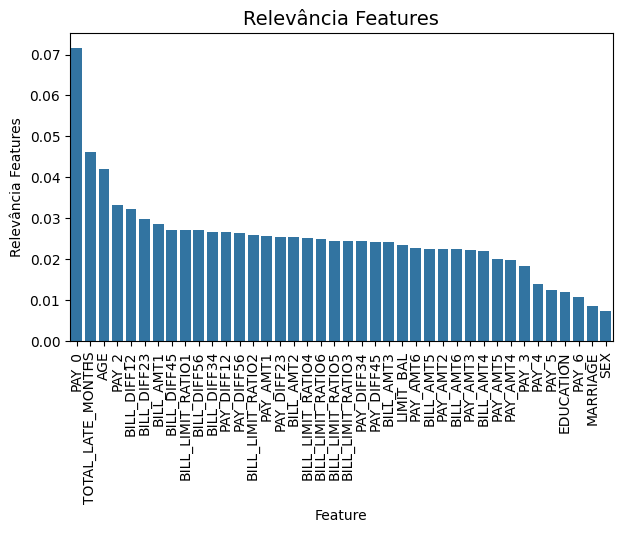

In [47]:
#Reavaliando Relevancia
colunasB = []
for coluna in dataset.columns:
    if (coluna != 'default.payment.next.month' and coluna != 'ID' ):
        colunasB.append(coluna)

train_df, val_df = train_test_split(dataset, test_size=0.20, random_state=2018, shuffle=True)
target = 'default.payment.next.month'
clf = RandomForestClassifier(n_jobs=4, random_state=2018,criterion='gini',n_estimators=100,verbose=False)

clf.fit(train_df[colunasB], train_df['default.payment.next.month'].values)


tmp = pd.DataFrame({'Feature': colunasB , 'Relevância Features': clf.feature_importances_})
tmp = tmp.sort_values(by='Relevância Features',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Relevância Features',fontsize=14)
s = sns.barplot(x='Feature',y='Relevância Features',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()


#PAY_0, TOTAL_LATE-MONTHS, AGE, PAY_2, BILL_DIFF12, BILL_DIFF23 SAO OS RELEVANTES


# 5 - Realize balanceamento da base de dados (utilizando técnicas como undersampling ou oversampling)

In [49]:
# Selecionar features relevantes
relevant_features = [
    'PAY_0', 'PAY_2', 'AGE', 'BILL_DIFF12', 'BILL_DIFF23','TOTAL_LATE_MONTHS','default.payment.next.month'
]
dataset = dataset[relevant_features]

# Separar os dados em features e alvo
X = dataset.drop(columns=['default.payment.next.month'])
y = dataset['default.payment.next.month']

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicação do SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Verificação do balanceamento
print("Distribuição das classes antes do SMOTE:")
print(y_train.value_counts())

print("\nDistribuição das classes após o SMOTE:")
print(y_train_res.value_counts())

Distribuição das classes antes do SMOTE:
default.payment.next.month
0    18677
1     5323
Name: count, dtype: int64

Distribuição das classes após o SMOTE:
default.payment.next.month
0    18677
1    18677
Name: count, dtype: int64


# 6 - Utilize as seguintes configurações para escolha e avaliação dos modelos de Machine Learning:
## a) Utilize os modelos Regressão Logística e Árvore de Decisão;
## b) Utilize as métricas acurácia e Área sob a Curva ROC (AUC-ROC);
## c) Divida de forma balanceada a base de dados em 75% treino e 25% testes;
## d) Utilize k-fold cross-validation.

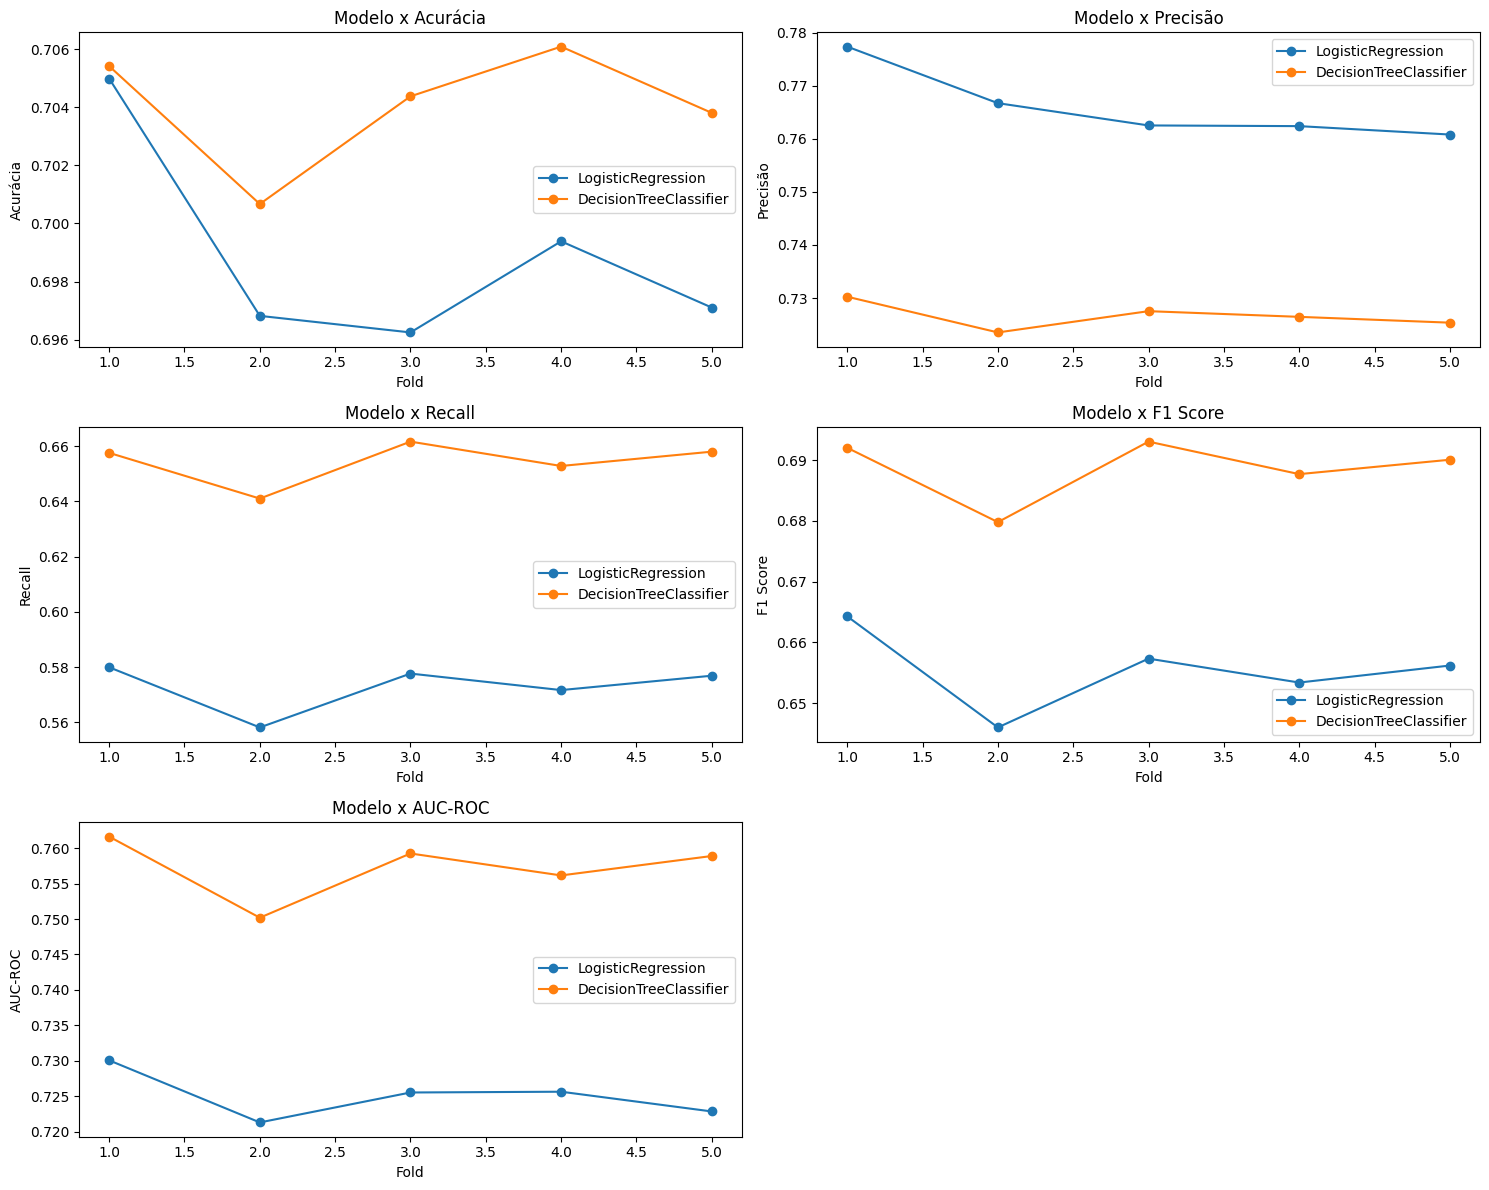

In [50]:
df = dataset

relevant_features = [
    'PAY_0', 'PAY_2', 'AGE', 'BILL_DIFF12', 'BILL_DIFF23', 'TOTAL_LATE_MONTHS', 'default.payment.next.month'
]
df = df[relevant_features]

X = df.drop(columns=['default.payment.next.month'])
y = df['default.payment.next.month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

clf_list = [
    LogisticRegression(max_iter=10000, solver='saga'),
    DecisionTreeClassifier(max_depth=3)
]

kf = KFold(n_splits=5, random_state=42, shuffle=True)
mdl = []
fold = []
acc_scr = []
prec_scr = []
rec_scr = []
f1_scr = []
auc_scr = []

for i, (train_index, test_index) in enumerate(kf.split(X_train_res, y_train_res)):
    X_train_fold, X_valid_fold = X_train_res[train_index], X_train_res[test_index]
    y_train_fold, y_valid_fold = y_train_res[train_index], y_train_res[test_index]

    for clf in clf_list:
        model_name = clf.__class__.__name__

        clf.fit(X_train_fold, y_train_fold)
        pred = clf.predict(X_valid_fold)
        pred_proba = clf.predict_proba(X_valid_fold)[:, 1]

        acc_score = accuracy_score(y_valid_fold, pred)
        prec_score = precision_score(y_valid_fold, pred, zero_division=0)
        rec_score = recall_score(y_valid_fold, pred, zero_division=0)
        f1 = f1_score(y_valid_fold, pred, zero_division=0)
        auc_score = roc_auc_score(y_valid_fold, pred_proba)

        fold.append(i + 1)
        acc_scr.append(acc_score)
        prec_scr.append(prec_score)
        rec_scr.append(rec_score)
        f1_scr.append(f1)
        auc_scr.append(auc_score)
        mdl.append(model_name)

data = pd.DataFrame({
    'Model': mdl,
    'Fold': fold,
    'Accuracy': acc_scr,
    'Precision': prec_scr,
    'Recall': rec_scr,
    'F1 Score': f1_scr,
    'AUC-ROC': auc_scr
})

plt.figure(figsize=(15, 12))

# Gráfico de Acurácia
plt.subplot(3, 2, 1)
for model in data['Model'].unique():
    model_data = data[data['Model'] == model]
    plt.plot(model_data['Fold'], model_data['Accuracy'], marker='o', label=model)
plt.title('Modelo x Acurácia')
plt.xlabel('Fold')
plt.ylabel('Acurácia')
plt.legend()

# Gráfico de Precisão
plt.subplot(3, 2, 2)
for model in data['Model'].unique():
    model_data = data[data['Model'] == model]
    plt.plot(model_data['Fold'], model_data['Precision'], marker='o', label=model)
plt.title('Modelo x Precisão')
plt.xlabel('Fold')
plt.ylabel('Precisão')
plt.legend()

# Gráfico de Recall
plt.subplot(3, 2, 3)
for model in data['Model'].unique():
    model_data = data[data['Model'] == model]
    plt.plot(model_data['Fold'], model_data['Recall'], marker='o', label=model)
plt.title('Modelo x Recall')
plt.xlabel('Fold')
plt.ylabel('Recall')
plt.legend()

# Gráfico de F1 Score
plt.subplot(3, 2, 4)
for model in data['Model'].unique():
    model_data = data[data['Model'] == model]
    plt.plot(model_data['Fold'], model_data['F1 Score'], marker='o', label=model)
plt.title('Modelo x F1 Score')
plt.xlabel('Fold')
plt.ylabel('F1 Score')
plt.legend()

# Gráfico de AUC-ROC
plt.subplot(3, 2, 5)
for model in data['Model'].unique():
    model_data = data[data['Model'] == model]
    plt.plot(model_data['Fold'], model_data['AUC-ROC'], marker='o', label=model)
plt.title('Modelo x AUC-ROC')
plt.xlabel('Fold')
plt.ylabel('AUC-ROC')
plt.legend()

plt.tight_layout()
plt.show()


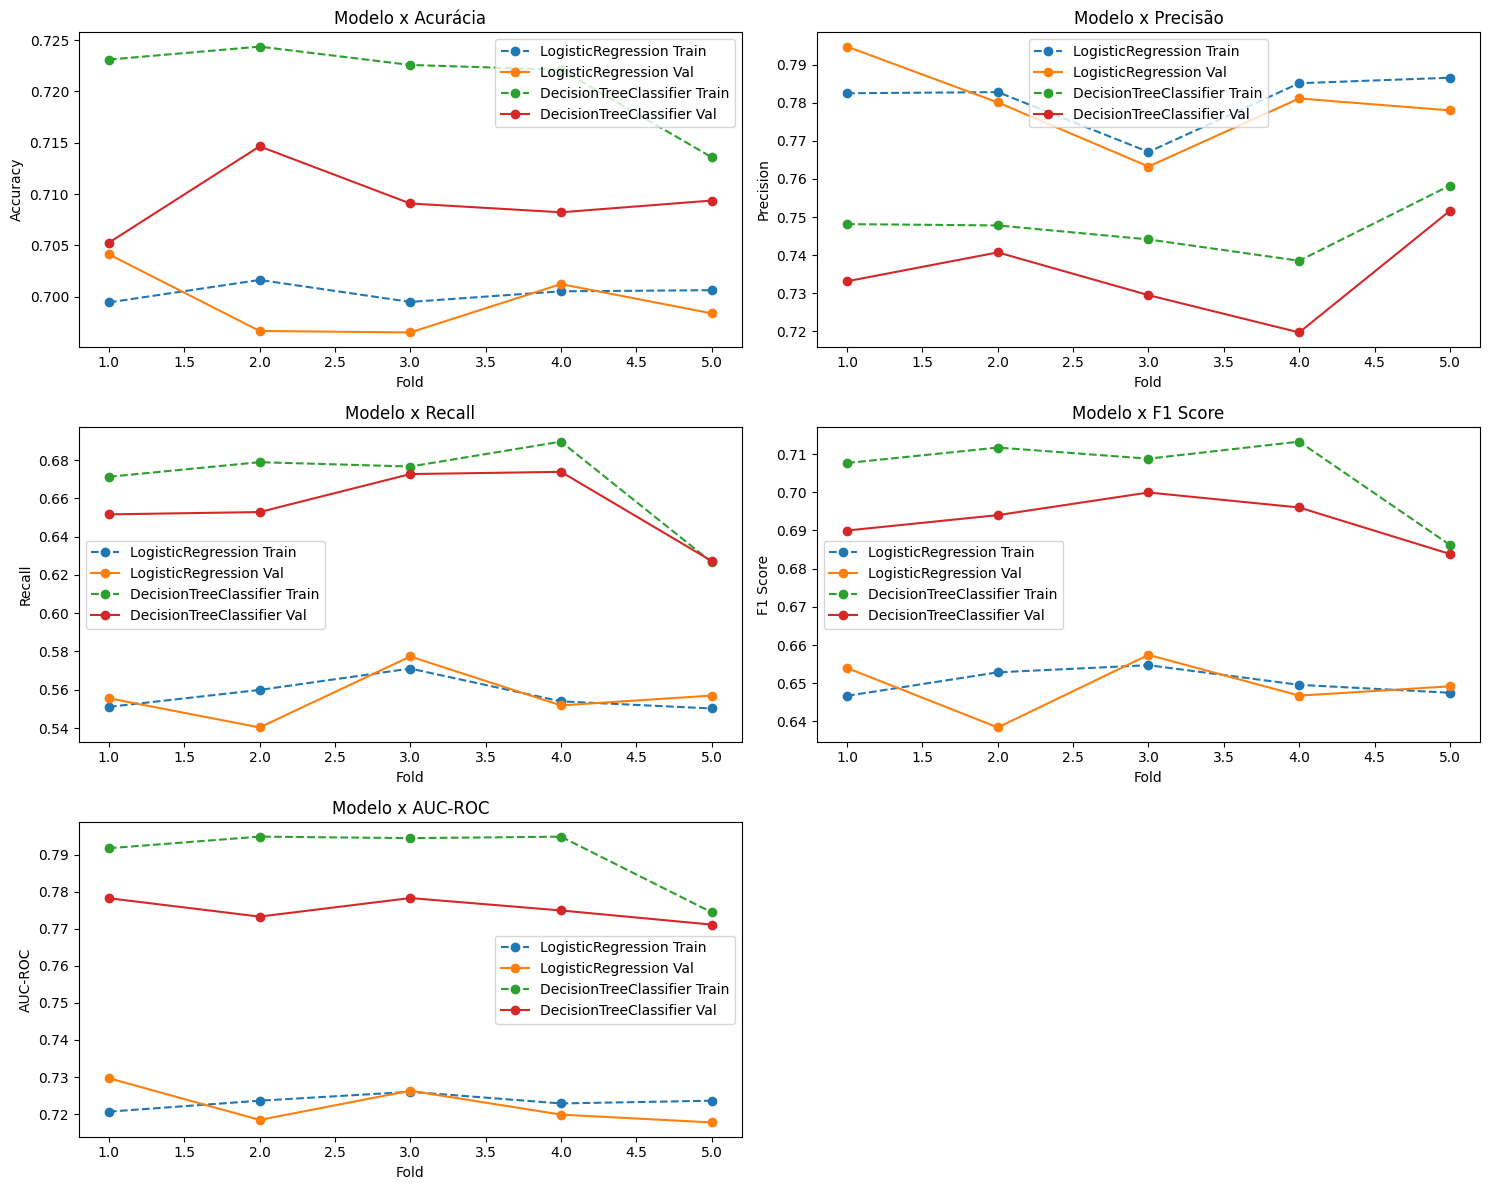

In [51]:
from sklearn.model_selection import GridSearchCV

kf = KFold(n_splits=5, random_state=42, shuffle=True)
mdl = []
fold = []
acc_train = []
acc_val = []
prec_train = []
prec_val = []
rec_train = []
rec_val = []
f1_train = []
f1_val = []
auc_train = []
auc_val = []

# Definição dos parâmetros a serem ajustados para cada classificador
param_grid = {
  'LogisticRegression': {
      'C': [0.0001, 0.001, 0.01],
      'solver': ['liblinear','lbfgs','saga'],
      'max_iter': [100,1000,10000]
  },
  'DecisionTreeClassifier': {
      'max_depth': [None, 3, 5,7]
  }
}

#LogisticRegression(max_iter=10000, solver='saga'),
#DecisionTreeClassifier(max_depth=3)
best_params={}
for i, (train_index, test_index) in enumerate(kf.split(X_train_res, y_train_res)):
  X_train_fold, X_valid_fold = X_train_res[train_index], X_train_res[test_index]
  y_train_fold, y_valid_fold = y_train_res[train_index], y_train_res[test_index]

  for clf in clf_list:
    model_name = clf.__class__.__name__

    # Aplicando GridSearchCV
    grid_search = GridSearchCV(clf, param_grid[model_name], cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_train_fold, y_train_fold)
    best_model = grid_search.best_estimator_
    best_params[model_name] = grid_search.best_params_

    best_model.fit(X_train_fold, y_train_fold)

    pred_train = best_model.predict(X_train_fold)
    pred_valid = best_model.predict(X_valid_fold)
    pred_proba_train = best_model.predict_proba(X_train_fold)[:, 1]
    pred_proba_valid = best_model.predict_proba(X_valid_fold)[:, 1]

    # Métricas para conjunto de treino
    acc_score_train = accuracy_score(y_train_fold, pred_train)
    prec_score_train = precision_score(y_train_fold, pred_train, zero_division=0)
    rec_score_train = recall_score(y_train_fold, pred_train, zero_division=0)
    f1_score_train = f1_score(y_train_fold, pred_train, zero_division=0)
    auc_score_train = roc_auc_score(y_train_fold, pred_proba_train)

    # Métricas para conjunto de validação
    acc_score_val = accuracy_score(y_valid_fold, pred_valid)
    prec_score_val = precision_score(y_valid_fold, pred_valid, zero_division=0)
    rec_score_val = recall_score(y_valid_fold, pred_valid, zero_division=0)
    f1_score_val = f1_score(y_valid_fold, pred_valid, zero_division=0)
    auc_score_val = roc_auc_score(y_valid_fold, pred_proba_valid)

    fold.append(i + 1)
    mdl.append(model_name)

    acc_train.append(acc_score_train)
    acc_val.append(acc_score_val)
    prec_train.append(prec_score_train)
    prec_val.append(prec_score_val)
    rec_train.append(rec_score_train)
    rec_val.append(rec_score_val)
    f1_train.append(f1_score_train)
    f1_val.append(f1_score_val)
    auc_train.append(auc_score_train)
    auc_val.append(auc_score_val)

data = pd.DataFrame({
    'Model': mdl,
    'Fold': fold,
    'Accuracy_Train': acc_train,
    'Accuracy_Val': acc_val,
    'Precision_Train': prec_train,
    'Precision_Val': prec_val,
    'Recall_Train': rec_train,
    'Recall_Val': rec_val,
    'F1 Score_Train': f1_train,
    'F1 Score_Val': f1_val,
    'AUC-ROC_Train': auc_train,
    'AUC-ROC_Val': auc_val
})

plt.figure(figsize=(15, 12))

# Função auxiliar para criar gráficos
def plot_metric(metric_name, title, subplot_index):
  plt.subplot(3, 2, subplot_index)
  for model in data['Model'].unique():
    model_data = data[data['Model'] == model]
    plt.plot(model_data['Fold'], model_data[metric_name + '_Train'], marker='o', linestyle='--', label=f'{model} Train')
    plt.plot(model_data['Fold'], model_data[metric_name + '_Val'], marker='o', label=f'{model} Val')
  plt.title(title)
  plt.xlabel('Fold')
  plt.ylabel(metric_name)
  plt.legend()

# Plotando métricas
plot_metric('Accuracy', 'Modelo x Acurácia', 1)
plot_metric('Precision', 'Modelo x Precisão', 2)
plot_metric('Recall', 'Modelo x Recall', 3)
plot_metric('F1 Score', 'Modelo x F1 Score', 4)
plot_metric('AUC-ROC', 'Modelo x AUC-ROC', 5)

plt.tight_layout()
plt.show()


In [52]:
best_params

{'LogisticRegression': {'C': 0.0001, 'max_iter': 100, 'solver': 'lbfgs'},
 'DecisionTreeClassifier': {'max_depth': 5}}

In [53]:
data

,Model,Fold,Accuracy_Train,Accuracy_Val,Precision_Train,Precision_Val,Recall_Train,Recall_Val,F1 Score_Train,F1 Score_Val,AUC-ROC_Train,AUC-ROC_Val
0,LogisticRegression,1,0.699458,0.704137,0.782547,0.794809,0.551054,0.555556,0.646709,0.653987,0.720677,0.729695
1,DecisionTreeClassifier,1,0.723106,0.705278,0.748129,0.733099,0.671311,0.651644,0.707641,0.689976,0.791725,0.778238
2,LogisticRegression,2,0.701644,0.696676,0.782842,0.780133,0.559898,0.540299,0.652861,0.638435,0.723627,0.718447
3,DecisionTreeClassifier,2,0.724364,0.714653,0.747785,0.740692,0.678910,0.652850,0.711685,0.694002,0.794851,0.773280
4,LogisticRegression,3,0.699504,0.696533,0.767118,0.763276,0.571061,0.577369,0.654727,0.657433,0.726019,0.726322
5,DecisionTreeClassifier,3,0.722581,0.709088,0.744104,0.729448,0.676651,0.672702,0.708776,0.699926,0.794445,0.778280
6,LogisticRegression,4,0.700539,0.701241,0.785188,0.781174,0.553918,0.551813,0.649583,0.646761,0.722887,0.719875
7,DecisionTreeClassifier,4,0.722117,0.708232,0.738491,0.719643,0.689658,0.673863,0.713239,0.696001,0.794839,0.774938
8,LogisticRegression,5,0.700646,0.698388,0.786633,0.778043,0.550211,0.556948,0.647516,0.649187,0.723622,0.717765
9,DecisionTreeClassifier,5,0.713593,0.709374,0.758269,0.751621,0.626650,0.627278,0.686206,0.683843,0.774438,0.771125


In [54]:
mean_metrics = data.groupby('Model').mean()
mean_metrics

,Fold,Accuracy_Train,Accuracy_Val,Precision_Train,Precision_Val,Recall_Train,Recall_Val,F1 Score_Train,F1 Score_Val,AUC-ROC_Train,AUC-ROC_Val
Model,,,,,,,,,,,
DecisionTreeClassifier,3.0,0.721152,0.709325,0.747356,0.734901,0.668636,0.655667,0.705509,0.692750,0.790060,0.775172
LogisticRegression,3.0,0.700358,0.699395,0.780866,0.779487,0.557228,0.556397,0.650279,0.649161,0.723367,0.722421


Os resultados obtidos para o dataset mostraram que os modelos de Regressão Logística e Classificação com Árvore de Decisão tiveram desempenhos distintos em termos de precisão, recall, F1 score e AUC-ROC. A Regressão Logística apresentou valores consistentes de precisão em torno de 0.78 tanto no treino quanto na validação, com um recall de aproximadamente 0.55. Isso resultou em um F1 score moderado e um AUC-ROC na faixa de 0.72. Já a Árvore de Decisão mostrou um desempenho ligeiramente superior em recall, alcançando valores próximos a 0.67 no treino e 0.66 na validação, com uma precisão menor em comparação à Regressão Logística. No entanto, o AUC-ROC da Árvore de Decisão foi consistentemente mais alto, indicando uma melhor capacidade de distinguir entre as classes.